In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
np.random.seed(123)
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#import data
train_data = pd.read_csv('data/Train_v2.csv')
test_data = pd.read_csv('data/Test_v2.csv')

train_data.shape

(23524, 13)

In [0]:
test_data.shape

(10086, 12)

In [0]:
train_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
test_data.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [6]:
submission = pd.read_csv('data/SubmissionFile.csv')
submission.head()

,uniqueid,bank_account
0,uniqueid_7867 x Kenya,1.0
1,uniqueid_6722 x Kenya,0.0
2,uniqueid_6714 x Kenya,1.0
3,uniqueid_8103 x Kenya,1.0
4,uniqueid_8657 x Kenya,1.0


In [7]:
#show Some information about the dataset
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


In [0]:
#preprocessing modules
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#convert Target label to numerical
le = LabelEncoder()
train_data['bank_account'] = le.fit_transform(train_data['bank_account'])

In [9]:
#separate features from target
X_train = train_data.drop(['bank_account'], axis=1)
y_train = train_data['bank_account']
print(y_train)

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int64


In [0]:
#fxn to preprocess data
def preprocessing_data(data):
    #convert numerical labels from integer to float
    float_array = data[["household_size", "age_of_respondent", "year"]].values.astype(float)
    
    #categorical feature to be converted to One Hot Encoding
    categ = [
        "relationship_with_head",
        "marital_status",
        "job_type",
        "country",
        "education_level"
    ]
    
    #one Hot Encoding conversion
    data = pd.get_dummies(data, prefix_sep='_', columns=categ)
    
    #label encorder conversion
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])
    
    #drop uniquid columns
    data = data.drop(["uniqueid"], axis=1)
    
    #scale data into range 0 and 1
    scaler = MinMaxScaler(feature_range=(0,1))
    data = scaler.fit_transform(data)
    
    return data

In [0]:
#preprocess train & test data
processed_train_data = preprocessing_data(X_train)
processed_test_data = preprocessing_data(test_data)

In [12]:
print(processed_train_data[:1])

[[1.        0.        1.        0.1       0.0952381 0.        0.
  0.        0.        0.        0.        1.        0.        0.
  1.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        1.        1.
  0.        0.        0.        0.        0.        0.        1.
  0.        0.       ]]


In [13]:
print(processed_train_data.shape)

(23524, 37)


In [0]:
#split train data
from sklearn.model_selection import train_test_split
X_Train, X_val, y_Train, y_val = train_test_split(processed_train_data, y_train, stratify = y_train, test_size=0.1, random_state=42)

In [0]:
#!pip install xgboost

In [0]:
#import classifier algorith here
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

In [0]:
#create models
lg_model = LogisticRegression()
rf_model = RandomForestClassifier()
kn_model = KNeighborsClassifier()
et_model = ExtraTreesClassifier()
xg_model = XGBClassifier()

In [18]:
#fitting models
lg_model.fit(X_Train, y_Train)
rf_model.fit(X_Train, y_Train)
kn_model.fit(X_Train, y_Train)
et_model.fit(X_Train, y_Train)
xg_model.fit(X_Train, y_Train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
#import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score

#evaluate the model
lg_y_pred = lg_model.predict(X_val)
rf_y_pred = rf_model.predict(X_val)
kn_y_pred = kn_model.predict(X_val)
et_y_pred = et_model.predict(X_val)
xg_y_pred = xg_model.predict(X_val)

In [21]:
#get error rate
print("Error rate of Logisitic Regression Classifier: ", 1 - accuracy_score(y_val, lg_y_pred))
print("Error rate of Random Forest Classifier: ", 1 - accuracy_score(y_val, rf_y_pred))
print("Error rate of KNeighbors Classifier: ", 1 - accuracy_score(y_val, kn_y_pred))
print("Error rate of Extra Tree Classifier: ", 1 - accuracy_score(y_val, et_y_pred))
print("Error rate of XGB Classifier: ", 1 - accuracy_score(y_val, xg_y_pred))

Error rate of Logisitic Regression Classifier:  0.11219719507012327
Error rate of Random Forest Classifier:  0.13259668508287292
Error rate of KNeighbors Classifier:  0.12027199320017001
Error rate of Extra Tree Classifier:  0.149171270718232
Error rate of XGB Classifier:  0.11049723756906082


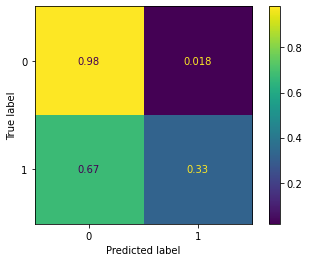

In [24]:
#Confusion matrix of XGB
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xg_model, X_val, y_val, normalize='true')

In [28]:
#dealing with Imbalanced data
#import GridSeaarchCV
from sklearn.model_selection import GridSearchCV

#optimize model parameters
param_grid = {'min_child_weight': [1,5,10],
              'gamma': [0.5,1],
              'subsample': [0.6,0.8,1.0],
              'max_depth': [3,5]
              }
my_xgb_model = GridSearchCV(xg_model, param_grid, n_jobs=-1, verbose=2, cv=5)
my_xgb_model.fit(X_Train, y_Train)
print(my_xgb_model.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  6.1min finished


{'gamma': 1, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.8}


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score

#fit by setting best parameters and evaluate model
xgb_model = XGBClassifier(min_child_weight=1, gamma=1, subsample=0.8, max_depth=5)

xgb_model.fit(X_Train, y_Train)
y_pred = xgb_model.predict(X_val)

#get error rate
print("Error rate of XGB classifier: ", 1 - accuracy_score(y_val, y_pred))

Error rate of XGB classifier:  0.10837229069273269


In [0]:
#get the predicted result for the test data
test_data.bank_account = xgb_model.predict(processed_test_data)

In [0]:
#create submission file
submission = pd.DataFrame({"uniqueid": test_data["uniqueid"] + " X " + test_data["country"], "bank_account": test_data.bank_account})

In [33]:
#show five samples
submission.sample(5)

,uniqueid,bank_account
415,uniqueid_6484 X Kenya,0
5296,uniqueid_11431 X Rwanda,0
6820,uniqueid_7095 X Tanzania,0
4300,uniqueid_10435 X Rwanda,0
8934,uniqueid_9209 X Tanzania,0


In [0]:
#creaate submission csv file
submission.to_csv('data/submission/first_submission.csv', index=False)